### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42) 

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200) 

> cf_h -   average coffee drinkers height

> ncf_h -  average non coffee drinkers height

   

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

Answer:  
  
    > h0: cf_h == ncf_h
    
    > h1: cf_h != ncf_h
    
NB: The statement above itself is the  null ~~Alternative~~
hypothesis because it tell us the two statistics are the same which is only typical for null hypotheis          

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

Answer:    
   
     h0 = (cf_h - ncf_h) >= 0

     h1 = (cf_h - ncf_h) < 0
     
NB: The statement above itself is the Alternative ~~null~~
 hypothesis because it does tell us the two statistics are the same which is only typical for null hypotheis     

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [62]:
sample_data[:2]

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636


In [63]:
cf_h_mean, ncf_h_mean, diffs = [], [], []

for _ in range(10000):
    new_sample = sample_data.sample(200, replace=True)
    cf_h = new_sample.query('drinks_coffee == True')['height'].mean()
    ncf_h = new_sample.query('drinks_coffee == False')['height'].mean()
    # append info
    cf_h_mean.append(cf_h)
    ncf_h_mean.append(ncf_h)
    diffs.append(cf_h - ncf_h)     

In [64]:
diffs[:2] 

[1.9732964788157403, 2.0377073558575063]

In [65]:
f'Standard deviation for mean height for coffee drinkers {np.std(cf_h_mean)}'

'Standard deviation for mean height for coffee drinkers 0.24073763373472962'

In [66]:
f'Standard deviation for mean height for non coffee drinkers {np.std(ncf_h_mean)}'

'Standard deviation for mean height for non coffee drinkers 0.4051263127747525'

In [67]:
f'Standard deviation sampled difference {np.std(diffs)}'

'Standard deviation sampled difference 0.4698091074387144'

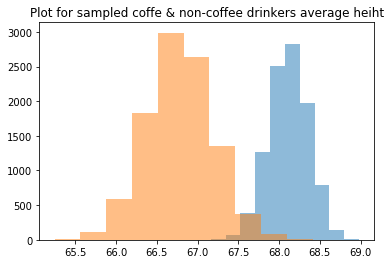

In [68]:
plt.hist(cf_h_mean, alpha=.5);
plt.hist(ncf_h_mean, alpha=.5);
plt.title('Plot for sampled coffe & non-coffee drinkers average heiht')
plt.show()

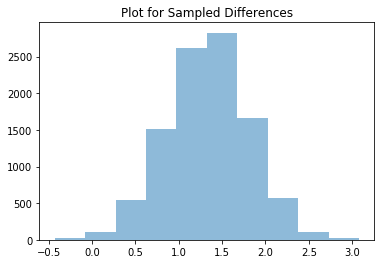

In [69]:
plt.hist(diffs, alpha=.5)
plt.title('Plot for Sampled Differences')
plt.show()

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true (centered on zero). You can do this by recentering your distribution at zero. 

Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [70]:
null_vals = np.random.normal(0, np.std(diffs), 10000) 
# Here are 10000 draws from the sampling distribution under the null 

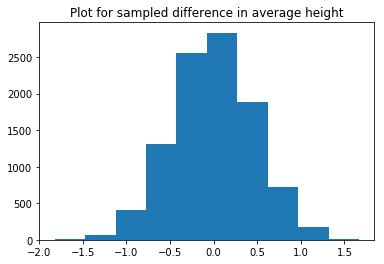

In [74]:
#Here is the sampling distribution of the difference under the null
plt.hist(null_vals);
plt.title('Plot for sampled difference in average height') 
plt.show() 

In [72]:
sample_data_ch = sample_data.query('drinks_coffee == True')['height'].mean()

f'sample_data_ch: {sample_data_ch}' 

'sample_data_ch: 68.11962990858616'

In [73]:
sample_data_nch = sample_data.query('drinks_coffee == False')['height'].mean()
f'sample_data_nch: {sample_data_nch}'

'sample_data_nch: 66.78492279927877'